In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns


In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,63491.0,-5.154021,-5.063897,-0.578159,0.291484,-0.569759,0.710331,0.955502,0.261072,0.967372,...,-0.341408,-0.929739,-1.097968,-1.056586,-0.132974,0.897327,1.080026,-1.404020,834.97,0
1,36962.0,1.102525,-0.462216,1.380379,1.052661,-1.083431,0.591557,-0.871807,0.351229,1.614009,...,-0.296797,-0.376794,0.064232,0.136096,0.260557,0.437381,0.040738,0.018013,9.95,0
2,41308.0,1.170812,0.066480,0.576424,0.577899,-0.645253,-0.807866,-0.096557,-0.007658,-0.048920,...,-0.196283,-0.701109,0.149418,0.498340,0.113536,0.066758,-0.043510,0.011157,17.99,0
3,89196.0,-0.403119,0.434126,-0.238276,-3.192074,0.834327,-1.707364,2.140568,-0.721126,0.841800,...,0.067215,0.598883,-0.192216,0.056011,0.213343,-0.410140,0.174489,0.003063,80.57,0
4,156233.0,1.404417,-1.250932,-0.806756,0.475530,-0.662776,-0.069252,-0.113961,0.007232,0.943377,...,-0.018967,-0.599758,0.081694,-0.502178,-0.536098,-0.683851,-0.025494,0.004301,297.63,0


In [3]:
fraud=df.loc[df['Class']==1]
non_frauds=df.loc[df['Class']==0]
print(len(fraud))
print(len(non_frauds))

492
284315


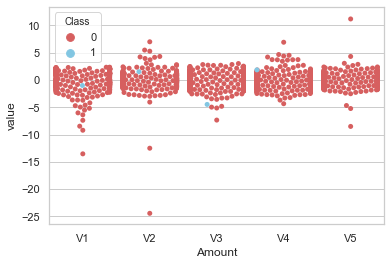

In [4]:
sns.set(style="whitegrid", palette="muted")
data = pd.melt(df.loc[:,['V1','V2','V3','V4','V5','Class']].sample(n=400,random_state = 4), "Class", var_name="Amount")
sns.swarmplot(x="Amount", y="value",hue="Class",palette=["r", "c"], data=data)

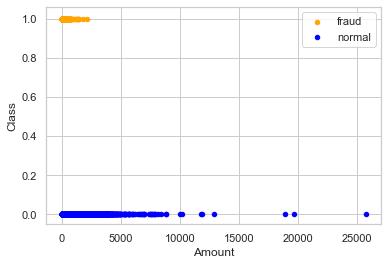

In [5]:
ax = fraud.plot.scatter(x='Amount',y='Class', color='Orange',label='fraud')
non_frauds.plot.scatter(x='Amount',y='Class', color='Blue',label='normal', ax=ax)
plt.show()

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [7]:
def normalize(X):
    
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [8]:
x=df.iloc[:, :-1]
y=df['Class']

normalize(x)

X_train, X_test, y_train, y_test =  train_test_split(x,y, test_size=0.25)

In [9]:
logistic=linear_model.LogisticRegression(C=1e2)
logistic.fit(X_train,y_train)
print("score:",logistic.score(X_test, y_test))

/home/bru/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 0.9991573270413753


**Fraud Detection**

our task 

- Explore the dataset/Visualize
- Decide which featuyre are important
- Performe machine learning
- Test the model of the testing set